<a href="https://colab.research.google.com/github/williamscli/CS539-Machine_Learning/blob/main/Distribution_of_digits_ipynb_txt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LAB 1-3


## The Distribution of First Digits

In this lab, you will explore the distribution of first digits in real data. For example, the first digits of the numbers 52, 30.8, and 0.07 are 5, 3, and 7 respectively. In this lab, you will investigate the question: how frequently does each digit 1-9 appear as the first digit of the number?

## Question 0

Make a prediction.

1. Approximately what percentage of the values do you think will have a _first_ digit of 1? What percentage of the values do you think will have a first digit of 9?
2. Approximately what percentage of the values do you think will have a _last_ digit of 1? What percentage of the values do you think will have a last digit of 9?

(Don't worry about being wrong. You will earn full credit for any justified answer.)

**I would expect the any digit at any position to have a 1/9 chance of appearing, since it one of the possible nine digits available in the combination**

## Question 1

The [S&P 500](https://en.wikipedia.org/wiki/S%26P_500_Index) is a stock index based on the market capitalizations of large companies that are publicly traded on the NYSE or NASDAQ. The [CSV file](https://raw.githubusercontent.com/dlsun/data-science-book/master/data/sp500.csv) contains data from February 1, 2018 about the stocks that comprise the S&P 500. We will investigate the first digit distributions of the variables in this data set.

Read in the S&P 500 data. What is the unit of observation in this data set? Is there a variable that is natural to use as the index? If so, set that variable to be the index. Once you are done, display the `DataFrame`.

In [ ]:
import csv
import pandas as pd
from matplotlib import pyplot as plt

# Read data
sp500=pd.read_csv("sp500.csv")

# Convert to dataframe
sp500=pd.DataFrame(sp500)

# Set the Name variable as the index
sp500.set_index('Name')

# Show data types
print(sp500.dtypes)

date      object
Name      object
open      object
close     object
volume     int64
dtype: object


**I am using the "Name" variable as my index, because there is a unique ID in the dataset, in other words, the stock name only shows up once. The "Name" column is also the unit of observation, because the user would most likely want to understand how a stock or group of stocks performs compared to others.**

## Question 2

We will start by looking at the `volume` column. This variable tells us how many shares were traded on that date.

Extract the first digit of every value in this column. (_Hint:_ First, turn the numbers into strings. Then, use the [text processing functionalities](https://pandas.pydata.org/pandas-docs/stable/text.html) of `pandas` to extract the first character of each string.) Make an appropriate visualization to display the distribution of the first digits. (_Hint:_ Think carefully about whether the variable you are plotting is quantitative or categorical.)

How does this compare with what you predicted in Question 0?

Text(0, 0.5, 'Frequency Count')

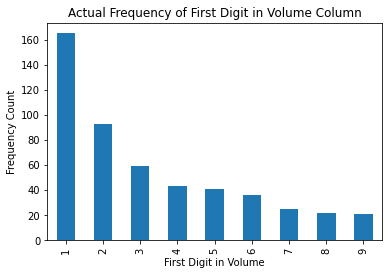

In [ ]:
# Convert data to string values
sp500=sp500.applymap(str)

# Extract the first character of volume string
sp500['VolumeInitial'] = sp500['volume'].str[:1]

# Print to verify correct value was extracted into VolumeInitial column
#print(sp500['volume'][:10])
#print(sp500['VolumeInitial'][:10])

# Count unique values in volume initial column
VolumeInitial=sp500.groupby('VolumeInitial').count()

# Bar chart vizualing count by digit
VolumeInitial['volume'].plot(kind='bar')
plt.title("Actual Frequency of First Digit in Volume Column")
plt.xlabel("First Digit in Volume")
plt.ylabel("Frequency Count")

**This is very different than what I predicted. The number 1 appears significantly more than the rest of the possible values, and in decending order, from 1-9, the values appear less frequently.**

## Question 3

Now, repeat Question 2, but for the distribution of _last_ digits. Again, make an appropriate visualization and compare with your prediction in Question 0.

Text(0, 0.5, 'Frequency Count')

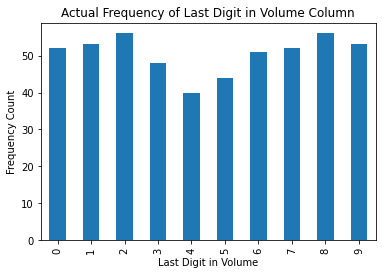

In [ ]:
# Extract the last character of volume string
sp500['VolumeLast'] = sp500['volume'].str[-1]

# Print to verify correct value was extracted into VolumeLast column
#print(sp500['volume'][:10])
#print(sp500['VolumeLast'][:10])

# Count unique values in volume initial column
VolumeLast=sp500.groupby('VolumeLast').count()

# Bar chart vizualing count by digit
VolumeLast['volume'].plot(kind='bar')
plt.title("Actual Frequency of Last Digit in Volume Column")
plt.xlabel("Last Digit in Volume")
plt.ylabel("Frequency Count")

**This is in line with what I predicted, within some margin acceptable error or probabilty.**

## Question 4

Maybe the `volume` column was just a fluke. Let's see if the first digit distribution holds up when we look at a very different variable: the closing price of the stock. Make a visualization of the first digit distribution of the closing price (the `close` column of the `DataFrame`). Comment on what you see.

(_Hint:_ What type did `pandas` infer this variable as and why? You will have to first clean the values using the [text processing functionalities](https://pandas.pydata.org/pandas-docs/stable/text.html) of `pandas` and then convert this variable to a quantitative variable.)

Text(0, 0.5, 'Frequency Count')

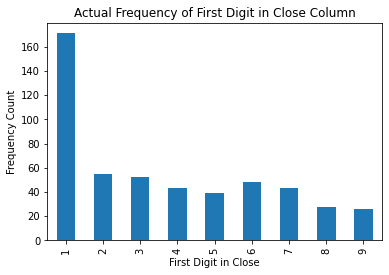

In [ ]:
# Extract the first character of close string
sp500['CloseInitial'] = sp500['close'].str[1:2]

# Print to verify correct value was extracted into CloseInitial column
#print(sp500['close'][:10])
#print(sp500['CloseInitial'][:10])

# Count unique values in close initial column
CloseInitial=sp500.groupby('CloseInitial').count()

# Bar chart vizualing count by digit
CloseInitial['close'].plot(kind='bar')
plt.title("Actual Frequency of First Digit in Close Column")
plt.xlabel("First Digit in Close")
plt.ylabel("Frequency Count")

Text(0, 0.5, 'Frequency Count')

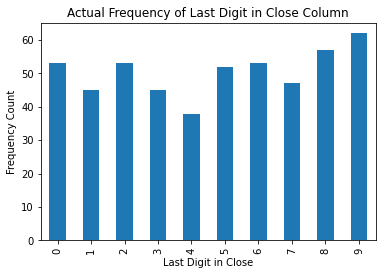

In [ ]:
# Extract the Last character of close string
sp500['CloseLast'] = sp500['close'].str[-1]

# Print to verify correct value was extracted into CloseLast column
#print(sp500['close'][:10])
#print(sp500['CloseLast'][:10])

# Count unique values in close last column
CloseLast=sp500.groupby('CloseLast').count()

# Bar chart vizualing count by digit
CloseLast['close'].plot(kind='bar')
plt.title("Actual Frequency of Last Digit in Close Column")
plt.xlabel("Last Digit in Close")
plt.ylabel("Frequency Count")

**The "Close" bar charts above summarizing the frequency of 1-9 in first and last digits look identical in comparison to the "Volume" charts. Why do the first and last value charts show different frequencies for each value? The last number is exactly what I predicted in Question 0, because it is the first number that will change in value when counting up or down. In other words, the ones place has the highest probablity to change or vary since it is the initial position to achieve a higher or lower number.**

**As you move higher in digit position order, the variance in the highest digit decreases. Since these values have digits in the hundreds place and up, the variability in the higher order digit positions decreases, while the lower order positions maintain the high variability.**

# Submission Instructions

Once you have filled out the Colab notebook completely, you are ready to submit. Your final submission will consist of the `.ipynb` and the `.pdf` files, as described below:

1. Download the Google Colab notebook as an iPython notebook
   * You can do this by going to *File \> Download .ipynb*
2. Print out a PDF of your Colab notebook.
   * In Google Chrome, you can do this by going to *File \> Print* and then choosing *Save to PDF*.
   * **Make sure you have run all cells first.**
   * Ensure you've closed the table of contents sidebar before you print so we can easily see your work and output.
3. Submit **both** the `.ipynb` notebook and the `.pdf` files via Blackboard or directly via the cloud using the Google Integration with Blackboard (if applicable).

---